In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv('cleaned_data.csv')

In [3]:
df_clean

,transaction_date,order_id,customer_id,product_id,product_name,category_name,price,quantity
0,2019-11-29,5034,7242,1971,Nấm Notaky tươi (Đà Lạt),Rau - Củ - Quả,96000,8.0
1,2019-09-06,5033,7241,1893,Rau Ngót Nhật,Rau - Củ - Quả,96000,4.0
2,2019-08-27,5032,7240,2315,Bơ Sáp Đông Lạnh,Trái cây,120000,1.0
3,2019-03-27,5031,7239,2165,Bí nụ,Rau - Củ - Quả,225000,30.0
4,2018-10-08,5030,7238,2103,Gạo Lứt Nàng Tiên,Gạo,300000,6.0
...,...,...,...,...,...,...,...,...
15295,2016-08-02,3,6128,1885,Xà Lách ta,Rau - Củ - Quả,7000,1.0
15296,2016-08-02,2,6128,1878,Rau cải ngọt - gói 300g,Rau - Củ - Quả,6000,1.0
15297,2016-08-02,2,6128,1886,Củ Cà Rốt,Rau - Củ - Quả,5000,1.0
15298,2016-08-02,2,6128,1885,Xà Lách ta,Rau - Củ - Quả,7000,1.0


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  15300 non-null  object 
 1   order_id          15300 non-null  int64  
 2   customer_id       15300 non-null  int64  
 3   product_id        15300 non-null  int64  
 4   product_name      15300 non-null  object 
 5   category_name     15300 non-null  object 
 6   price             15300 non-null  int64  
 7   quantity          15300 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 956.4+ KB


In [5]:
df_clean

,transaction_date,order_id,customer_id,product_id,product_name,category_name,price,quantity
0,2019-11-29,5034,7242,1971,Nấm Notaky tươi (Đà Lạt),Rau - Củ - Quả,96000,8.0
1,2019-09-06,5033,7241,1893,Rau Ngót Nhật,Rau - Củ - Quả,96000,4.0
2,2019-08-27,5032,7240,2315,Bơ Sáp Đông Lạnh,Trái cây,120000,1.0
3,2019-03-27,5031,7239,2165,Bí nụ,Rau - Củ - Quả,225000,30.0
4,2018-10-08,5030,7238,2103,Gạo Lứt Nàng Tiên,Gạo,300000,6.0
...,...,...,...,...,...,...,...,...
15295,2016-08-02,3,6128,1885,Xà Lách ta,Rau - Củ - Quả,7000,1.0
15296,2016-08-02,2,6128,1878,Rau cải ngọt - gói 300g,Rau - Củ - Quả,6000,1.0
15297,2016-08-02,2,6128,1886,Củ Cà Rốt,Rau - Củ - Quả,5000,1.0
15298,2016-08-02,2,6128,1885,Xà Lách ta,Rau - Củ - Quả,7000,1.0


In [6]:
df_clean.category_name.value_counts()

Rau - Củ - Quả                8481
Gia Cầm                       1547
Cá - Cua - Mực                1467
Trái cây                      1330
Thịt Heo                      1320
Thực Phẩm Khô                  745
Thịt Bò                        279
Hàng Tết 2017                   61
Gạo                             47
Nấu ăn là chuyện nhỏ            18
Combo Tiện Lợi                   3
Dinh Dưỡng Cho Bé 1-3 Tuổi       2
Name: category_name, dtype: int64

In [7]:
df_ca = df_clean.groupby(['customer_id','category_name'])['price'].count().reset_index(name = 'num_purchase')

In [8]:
df_ca = df_ca.drop(['num_purchase'], axis = 1)

In [9]:
df_ca

,customer_id,category_name
0,5518,Rau - Củ - Quả
1,5518,Trái cây
2,6128,Combo Tiện Lợi
3,6128,Cá - Cua - Mực
4,6128,Gia Cầm
...,...,...
2124,7238,Gạo
2125,7239,Rau - Củ - Quả
2126,7240,Trái cây
2127,7241,Rau - Củ - Quả


In [10]:
df_sub = df_ca.drop_duplicates(subset = ['customer_id'])

In [11]:
df_sub

,customer_id,category_name
0,5518,Rau - Củ - Quả
2,6128,Combo Tiện Lợi
11,6129,Cá - Cua - Mực
18,6130,Gia Cầm
23,6131,Cá - Cua - Mực
...,...,...
2124,7238,Gạo
2125,7239,Rau - Củ - Quả
2126,7240,Trái cây
2127,7241,Rau - Củ - Quả


In [12]:
df_01 = df_ca[df_ca.category_name == 'Rau - Củ - Quả']
df_02 = df_ca[df_ca.category_name == 'Gia Cầm']
df_03 = df_ca[df_ca.category_name == 'Cá - Cua - Mực']
df_04 = df_ca[df_ca.category_name == 'Trái cây']
df_05 = df_ca[df_ca.category_name == 'Thịt Heo']
df_06 = df_ca[df_ca.category_name == 'Thực Phẩm Khô']
df_07 = df_ca[df_ca.category_name == 'Thịt Bò']
df_08 = df_ca[df_ca.category_name == 'Hàng Tết 2017']
df_09 = df_ca[df_ca.category_name == 'Gạo']
df_10 = df_ca[df_ca.category_name == 'Nấu ăn là chuyện nhỏ']
df_11 = df_ca[df_ca.category_name == 'Combo Tiện Lợi']
df_12 = df_ca[df_ca.category_name == 'Dinh Dưỡng Cho Bé 1-3 Tuổi']

In [13]:
df_final = pd.merge(df_01,df_02, on = 'customer_id', how = 'left')

In [14]:
df_final = pd.merge(df_final,df_03, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_04, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_05, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_06, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_07, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_08, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_09, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_10, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_11, on = 'customer_id', how = 'left')
df_final = pd.merge(df_final,df_12, on = 'customer_id', how = 'left')

In [15]:
df_final

,customer_id,category_name_x,category_name_y,category_name_x,category_name_y,category_name_x,category_name_y,category_name_x,category_name_y,category_name_x,category_name_y,category_name_x,category_name_y
0,5518,Rau - Củ - Quả,NaN,NaN,Trái cây,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6128,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,Hàng Tết 2017,NaN,NaN,Combo Tiện Lợi,NaN
2,6129,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,NaN,NaN,NaN,NaN,NaN
3,6130,Rau - Củ - Quả,Gia Cầm,NaN,Trái cây,Thịt Heo,Thực Phẩm Khô,NaN,NaN,NaN,NaN,NaN,NaN
4,6131,Rau - Củ - Quả,NaN,Cá - Cua - Mực,Trái cây,Thịt Heo,NaN,Thịt Bò,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,7220,Rau - Củ - Quả,NaN,Cá - Cua - Mực,NaN,Thịt Heo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,7237,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,7239,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,7241,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_final.columns = ['customer_id','Rau - Củ - Quả','Gia Cầm','Cá - Cua - Mực', 'Trái Cây','Thịt Heo','Thực Phẩm Khô',
                   'Thịt Bò','Hàng Tết 2017','Gạo','Nấu ăn là chuyện nhỏ','Combo Tiện Lợi',
                    'Dinh Dưỡng Cho Bé 1-3 Tuổi']
col = ['Combo Tiện Lợi','Dinh Dưỡng Cho Bé 1-3 Tuổi']

In [17]:
df_final = df_final.drop(col, axis = 1)

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           404 non-null    int64 
 1   Rau - Củ - Quả        404 non-null    object
 2   Gia Cầm               211 non-null    object
 3   Cá - Cua - Mực        201 non-null    object
 4   Trái Cây              211 non-null    object
 5   Thịt Heo              185 non-null    object
 6   Thực Phẩm Khô         157 non-null    object
 7   Thịt Bò               92 non-null     object
 8   Hàng Tết 2017         31 non-null     object
 9   Gạo                   24 non-null     object
 10  Nấu ăn là chuyện nhỏ  12 non-null     object
dtypes: int64(1), object(10)
memory usage: 37.9+ KB


In [19]:
df_final

,customer_id,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái Cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,Hàng Tết 2017,Gạo,Nấu ăn là chuyện nhỏ
0,5518,Rau - Củ - Quả,NaN,NaN,Trái cây,NaN,NaN,NaN,NaN,NaN,NaN
1,6128,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,Hàng Tết 2017,NaN,NaN
2,6129,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,NaN,NaN,NaN
3,6130,Rau - Củ - Quả,Gia Cầm,NaN,Trái cây,Thịt Heo,Thực Phẩm Khô,NaN,NaN,NaN,NaN
4,6131,Rau - Củ - Quả,NaN,Cá - Cua - Mực,Trái cây,Thịt Heo,NaN,Thịt Bò,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
399,7220,Rau - Củ - Quả,NaN,Cá - Cua - Mực,NaN,Thịt Heo,NaN,NaN,NaN,NaN,NaN
400,7237,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,7239,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,7241,Rau - Củ - Quả,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_final = df_final.fillna(0)

In [21]:
col_final = ['Rau - Củ - Quả','Gia Cầm','Cá - Cua - Mực', 'Trái Cây','Thịt Heo','Thực Phẩm Khô',
                   'Thịt Bò','Hàng Tết 2017','Gạo','Nấu ăn là chuyện nhỏ']

In [22]:
for col in col_final:
    for i in range(len(df_final[col])):
        if df_final[col][i] != 0:
            df_final[col][i] = 1
            

<ipython-input-22-52c44f4a6390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col][i] = 1


In [23]:
df_final.head()

,customer_id,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái Cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,Hàng Tết 2017,Gạo,Nấu ăn là chuyện nhỏ
0,5518,1,0,0,1,0,0,0,0,0,0
1,6128,1,1,1,1,1,1,1,1,0,0
2,6129,1,1,1,1,1,1,1,0,0,0
3,6130,1,1,0,1,1,1,0,0,0,0
4,6131,1,0,1,1,1,0,1,0,0,0


In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           404 non-null    int64 
 1   Rau - Củ - Quả        404 non-null    object
 2   Gia Cầm               404 non-null    object
 3   Cá - Cua - Mực        404 non-null    object
 4   Trái Cây              404 non-null    object
 5   Thịt Heo              404 non-null    object
 6   Thực Phẩm Khô         404 non-null    object
 7   Thịt Bò               404 non-null    object
 8   Hàng Tết 2017         404 non-null    object
 9   Gạo                   404 non-null    object
 10  Nấu ăn là chuyện nhỏ  404 non-null    object
dtypes: int64(1), object(10)
memory usage: 57.9+ KB


In [25]:
df_final[col_final] = df_final[col_final].astype('int')

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   customer_id           404 non-null    int64
 1   Rau - Củ - Quả        404 non-null    int32
 2   Gia Cầm               404 non-null    int32
 3   Cá - Cua - Mực        404 non-null    int32
 4   Trái Cây              404 non-null    int32
 5   Thịt Heo              404 non-null    int32
 6   Thực Phẩm Khô         404 non-null    int32
 7   Thịt Bò               404 non-null    int32
 8   Hàng Tết 2017         404 non-null    int32
 9   Gạo                   404 non-null    int32
 10  Nấu ăn là chuyện nhỏ  404 non-null    int32
dtypes: int32(10), int64(1)
memory usage: 42.1 KB


In [27]:
from sklearn.metrics import accuracy_score
import numpy as np

In [28]:
col_rau = col_final

In [29]:
li_rau = []
score_rau = []
for col in col_rau:
    
    li_rau.append(col)
    score_rau.append(accuracy_score(df_final['Rau - Củ - Quả'], df_final[col]))
                   
    print(col,accuracy_score(df_final['Rau - Củ - Quả'], df_final[col]),'\n')

Rau - Củ - Quả 1.0 

Gia Cầm 0.5222772277227723 

Cá - Cua - Mực 0.4975247524752475 

Trái Cây 0.5222772277227723 

Thịt Heo 0.45792079207920794 

Thực Phẩm Khô 0.3886138613861386 

Thịt Bò 0.22772277227722773 

Hàng Tết 2017 0.07673267326732673 

Gạo 0.0594059405940594 

Nấu ăn là chuyện nhỏ 0.0297029702970297 



In [30]:
data_rau = {'Category': 'Rau - Củ - Quả','Category_name':li_rau, 'Score':score_rau}
f1 = score_rau
f1

[1.0,
 0.5222772277227723,
 0.4975247524752475,
 0.5222772277227723,
 0.45792079207920794,
 0.3886138613861386,
 0.22772277227722773,
 0.07673267326732673,
 0.0594059405940594,
 0.0297029702970297]

In [31]:
# Rau Củ Quả với các Catogory trước

In [32]:
col_gia_cam = col_final
li_gia_cam = []
score_gia_cam = []
for col in col_gia_cam:
    
    li_gia_cam.append(col)
    score_gia_cam.append(accuracy_score(df_final['Gia Cầm'], df_final[col]))
    
    print(col,accuracy_score(df_final['Gia Cầm'], df_final[col]),'\n')

data_gia_cam = {'Category': 'Gia Cầm','Category_name':li_gia_cam, 'Score':score_gia_cam}
f2 = score_gia_cam
f2

Rau - Củ - Quả 0.5222772277227723 

Gia Cầm 1.0 

Cá - Cua - Mực 0.6188118811881188 

Trái Cây 0.6336633663366337 

Thịt Heo 0.594059405940594 

Thực Phẩm Khô 0.6287128712871287 

Thịt Bò 0.5767326732673267 

Hàng Tết 2017 0.5148514851485149 

Gạo 0.5173267326732673 

Nấu ăn là chuyện nhỏ 0.48267326732673266 



[0.5222772277227723,
 1.0,
 0.6188118811881188,
 0.6336633663366337,
 0.594059405940594,
 0.6287128712871287,
 0.5767326732673267,
 0.5148514851485149,
 0.5173267326732673,
 0.48267326732673266]

In [33]:
# Gia cầm với các Catogory trước

In [34]:
col_ca = col_final

li_ca = []
score_ca = []

for col in col_ca:
    
    li_ca.append(col)
    score_ca.append(accuracy_score(df_final['Cá - Cua - Mực'], df_final[col]))
    
    print(col,accuracy_score(df_final['Cá - Cua - Mực'], df_final[col]),'\n')
    
data_ca = {'Category': 'Cá - Cua - Mực','Category_name':li_ca, 'Score':score_ca}
f3 = score_ca
f3

Rau - Củ - Quả 0.4975247524752475 

Gia Cầm 0.6188118811881188 

Cá - Cua - Mực 1.0 

Trái Cây 0.6138613861386139 

Thịt Heo 0.7079207920792079 

Thực Phẩm Khô 0.6188118811881188 

Thịt Bò 0.6212871287128713 

Hàng Tết 2017 0.5495049504950495 

Gạo 0.5371287128712872 

Nấu ăn là chuyện nhỏ 0.5123762376237624 



[0.4975247524752475,
 0.6188118811881188,
 1.0,
 0.6138613861386139,
 0.7079207920792079,
 0.6188118811881188,
 0.6212871287128713,
 0.5495049504950495,
 0.5371287128712872,
 0.5123762376237624]

In [35]:
col_trai_cay = col_final

li_trai_cay = []
score_trai_cay = []
for col in col_trai_cay:
    li_trai_cay.append(col)
    score_trai_cay.append(accuracy_score(df_final['Trái Cây'], df_final[col]))
    print(col,accuracy_score(df_final['Trái Cây'], df_final[col]),'\n')
    
data_trai_cay = {'Category': 'Trái Cây','Category_name':li_trai_cay, 'Score':score_trai_cay}
f4 = score_trai_cay
f4

Rau - Củ - Quả 0.5222772277227723 

Gia Cầm 0.6336633663366337 

Cá - Cua - Mực 0.6138613861386139 

Trái Cây 1.0 

Thịt Heo 0.5742574257425742 

Thực Phẩm Khô 0.6287128712871287 

Thịt Bò 0.5668316831683168 

Hàng Tết 2017 0.5148514851485149 

Gạo 0.5173267326732673 

Nấu ăn là chuyện nhỏ 0.4975247524752475 



[0.5222772277227723,
 0.6336633663366337,
 0.6138613861386139,
 1.0,
 0.5742574257425742,
 0.6287128712871287,
 0.5668316831683168,
 0.5148514851485149,
 0.5173267326732673,
 0.4975247524752475]

In [36]:
col_thit_heo = col_final
li_thit_heo = []
score_thit_heo = []
for col in col_thit_heo:
    li_thit_heo.append(col)
    score_thit_heo.append(accuracy_score(df_final['Thịt Heo'], df_final[col]))
    print(col,accuracy_score(df_final['Thịt Heo'], df_final[col]),'\n')
    
data_thit_heo = {'Category': 'Thịt Heo','Category_name':li_thit_heo, 'Score':score_thit_heo}
f5 = score_thit_heo
f5

Rau - Củ - Quả 0.45792079207920794 

Gia Cầm 0.594059405940594 

Cá - Cua - Mực 0.7079207920792079 

Trái Cây 0.5742574257425742 

Thịt Heo 1.0 

Thực Phẩm Khô 0.6039603960396039 

Thịt Bò 0.6410891089108911 

Hàng Tết 2017 0.5742574257425742 

Gạo 0.556930693069307 

Nấu ăn là chuyện nhỏ 0.556930693069307 



[0.45792079207920794,
 0.594059405940594,
 0.7079207920792079,
 0.5742574257425742,
 1.0,
 0.6039603960396039,
 0.6410891089108911,
 0.5742574257425742,
 0.556930693069307,
 0.556930693069307]

In [37]:
col_thuc_pham_kho = col_final
li_thuc_pham_kho = []
score_thuc_pham_kho = []
for col in col_thuc_pham_kho:
    li_thuc_pham_kho.append(col)
    score_thuc_pham_kho.append(accuracy_score(df_final['Thực Phẩm Khô'], df_final[col]))
    print(col,accuracy_score(df_final['Thực Phẩm Khô'], df_final[col]),'\n')
    
data_thuc_pham_kho = {'Category': 'Thực Phẩm Khô','Category_name':li_thuc_pham_kho, 'Score':score_thuc_pham_kho}
f6 = score_thuc_pham_kho 
f6

Rau - Củ - Quả 0.3886138613861386 

Gia Cầm 0.6287128712871287 

Cá - Cua - Mực 0.6188118811881188 

Trái Cây 0.6287128712871287 

Thịt Heo 0.6039603960396039 

Thực Phẩm Khô 1.0 

Thịt Bò 0.650990099009901 

Hàng Tết 2017 0.6435643564356436 

Gạo 0.6608910891089109 

Nấu ăn là chuyện nhỏ 0.6113861386138614 



[0.3886138613861386,
 0.6287128712871287,
 0.6188118811881188,
 0.6287128712871287,
 0.6039603960396039,
 1.0,
 0.650990099009901,
 0.6435643564356436,
 0.6608910891089109,
 0.6113861386138614]

In [38]:
col_thit_bo = col_final
li_thit_bo = []
score_thit_bo = []
for col in col_thit_bo:
    li_thit_bo.append(col)
    score_thit_bo.append(accuracy_score(df_final['Thịt Bò'], df_final[col]))
    print(col,accuracy_score(df_final['Thịt Bò'], df_final[col]),'\n')

data_thit_bo = {'Category': 'Thịt Bò','Category_name':li_thit_bo, 'Score':score_thit_bo}
f7 = score_thit_bo
f7

Rau - Củ - Quả 0.22772277227722773 

Gia Cầm 0.5767326732673267 

Cá - Cua - Mực 0.6212871287128713 

Trái Cây 0.5668316831683168 

Thịt Heo 0.6410891089108911 

Thực Phẩm Khô 0.650990099009901 

Thịt Bò 1.0 

Hàng Tết 2017 0.754950495049505 

Gạo 0.7722772277227723 

Nấu ăn là chuyện nhỏ 0.7574257425742574 



[0.22772277227722773,
 0.5767326732673267,
 0.6212871287128713,
 0.5668316831683168,
 0.6410891089108911,
 0.650990099009901,
 1.0,
 0.754950495049505,
 0.7722772277227723,
 0.7574257425742574]

In [39]:
col_hang_tet = col_final
li_hang_tet = []
score_hang_tet = []
for col in col_hang_tet:
    li_hang_tet.append(col)
    score_hang_tet.append(accuracy_score(df_final['Hàng Tết 2017'], df_final[col]))
    print(col,accuracy_score(df_final['Hàng Tết 2017'], df_final[col]),'\n')
    
data_hang_tet = {'Category': 'Hàng Tết 2017','Category_name':li_hang_tet, 'Score':score_hang_tet}
f8 = score_hang_tet
f8

Rau - Củ - Quả 0.07673267326732673 

Gia Cầm 0.5148514851485149 

Cá - Cua - Mực 0.5495049504950495 

Trái Cây 0.5148514851485149 

Thịt Heo 0.5742574257425742 

Thực Phẩm Khô 0.6435643564356436 

Thịt Bò 0.754950495049505 

Hàng Tết 2017 1.0 

Gạo 0.9034653465346535 

Nấu ăn là chuyện nhỏ 0.8985148514851485 



[0.07673267326732673,
 0.5148514851485149,
 0.5495049504950495,
 0.5148514851485149,
 0.5742574257425742,
 0.6435643564356436,
 0.754950495049505,
 1.0,
 0.9034653465346535,
 0.8985148514851485]

In [40]:
col_gao = col_final
li_gao = []
score_gao = []
for col in col_gao:
    li_gao.append(col)
    score_gao.append(accuracy_score(df_final['Gạo'], df_final[col]))
    print(col,accuracy_score(df_final['Gạo'], df_final[col]),'\n')

data_gao = {'Category': 'Gạo','Category_name':li_gao, 'Score':score_gao}
f9 = score_gao
f9

Rau - Củ - Quả 0.0594059405940594 

Gia Cầm 0.5173267326732673 

Cá - Cua - Mực 0.5371287128712872 

Trái Cây 0.5173267326732673 

Thịt Heo 0.556930693069307 

Thực Phẩm Khô 0.6608910891089109 

Thịt Bò 0.7722772277227723 

Hàng Tết 2017 0.9034653465346535 

Gạo 1.0 

Nấu ăn là chuyện nhỏ 0.9207920792079208 



[0.0594059405940594,
 0.5173267326732673,
 0.5371287128712872,
 0.5173267326732673,
 0.556930693069307,
 0.6608910891089109,
 0.7722772277227723,
 0.9034653465346535,
 1.0,
 0.9207920792079208]

In [41]:
f9

[0.0594059405940594,
 0.5173267326732673,
 0.5371287128712872,
 0.5173267326732673,
 0.556930693069307,
 0.6608910891089109,
 0.7722772277227723,
 0.9034653465346535,
 1.0,
 0.9207920792079208]

In [42]:
col_nau_an = col_final
li_nau_an = []
score_nau_an = []
for col in col_nau_an:
    li_nau_an.append(col)
    score_nau_an.append(accuracy_score(df_final['Nấu ăn là chuyện nhỏ'], df_final[col]))
    print(col,accuracy_score(df_final['Nấu ăn là chuyện nhỏ'], df_final[col]),'\n')

data_nau_an = {'Category': 'Nấu ăn là chuyện nhỏ','Category_name':li_nau_an, 'Score':score_nau_an}
f10 = score_nau_an

Rau - Củ - Quả 0.0297029702970297 

Gia Cầm 0.48267326732673266 

Cá - Cua - Mực 0.5123762376237624 

Trái Cây 0.4975247524752475 

Thịt Heo 0.556930693069307 

Thực Phẩm Khô 0.6113861386138614 

Thịt Bò 0.7574257425742574 

Hàng Tết 2017 0.8985148514851485 

Gạo 0.9207920792079208 

Nấu ăn là chuyện nhỏ 1.0 



In [43]:
f10

[0.0297029702970297,
 0.48267326732673266,
 0.5123762376237624,
 0.4975247524752475,
 0.556930693069307,
 0.6113861386138614,
 0.7574257425742574,
 0.8985148514851485,
 0.9207920792079208,
 1.0]

In [44]:
col = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]
f_all = pd.DataFrame(col, index = list(col_final), columns = list(col_final))
f_all

,Rau - Củ - Quả,Gia Cầm,Cá - Cua - Mực,Trái Cây,Thịt Heo,Thực Phẩm Khô,Thịt Bò,Hàng Tết 2017,Gạo,Nấu ăn là chuyện nhỏ
Rau - Củ - Quả,1.000000,0.522277,0.497525,0.522277,0.457921,0.388614,0.227723,0.076733,0.059406,0.029703
Gia Cầm,0.522277,1.000000,0.618812,0.633663,0.594059,0.628713,0.576733,0.514851,0.517327,0.482673
Cá - Cua - Mực,0.497525,0.618812,1.000000,0.613861,0.707921,0.618812,0.621287,0.549505,0.537129,0.512376
Trái Cây,0.522277,0.633663,0.613861,1.000000,0.574257,0.628713,0.566832,0.514851,0.517327,0.497525
Thịt Heo,0.457921,0.594059,0.707921,0.574257,1.000000,0.603960,0.641089,0.574257,0.556931,0.556931
Thực Phẩm Khô,0.388614,0.628713,0.618812,0.628713,0.603960,1.000000,0.650990,0.643564,0.660891,0.611386
Thịt Bò,0.227723,0.576733,0.621287,0.566832,0.641089,0.650990,1.000000,0.754950,0.772277,0.757426
Hàng Tết 2017,0.076733,0.514851,0.549505,0.514851,0.574257,0.643564,0.754950,1.000000,0.903465,0.898515
Gạo,0.059406,0.517327,0.537129,0.517327,0.556931,0.660891,0.772277,0.903465,1.000000,0.920792
Nấu ăn là chuyện nhỏ,0.029703,0.482673,0.512376,0.497525,0.556931,0.611386,0.757426,0.898515,0.920792,1.000000


<AxesSubplot:>

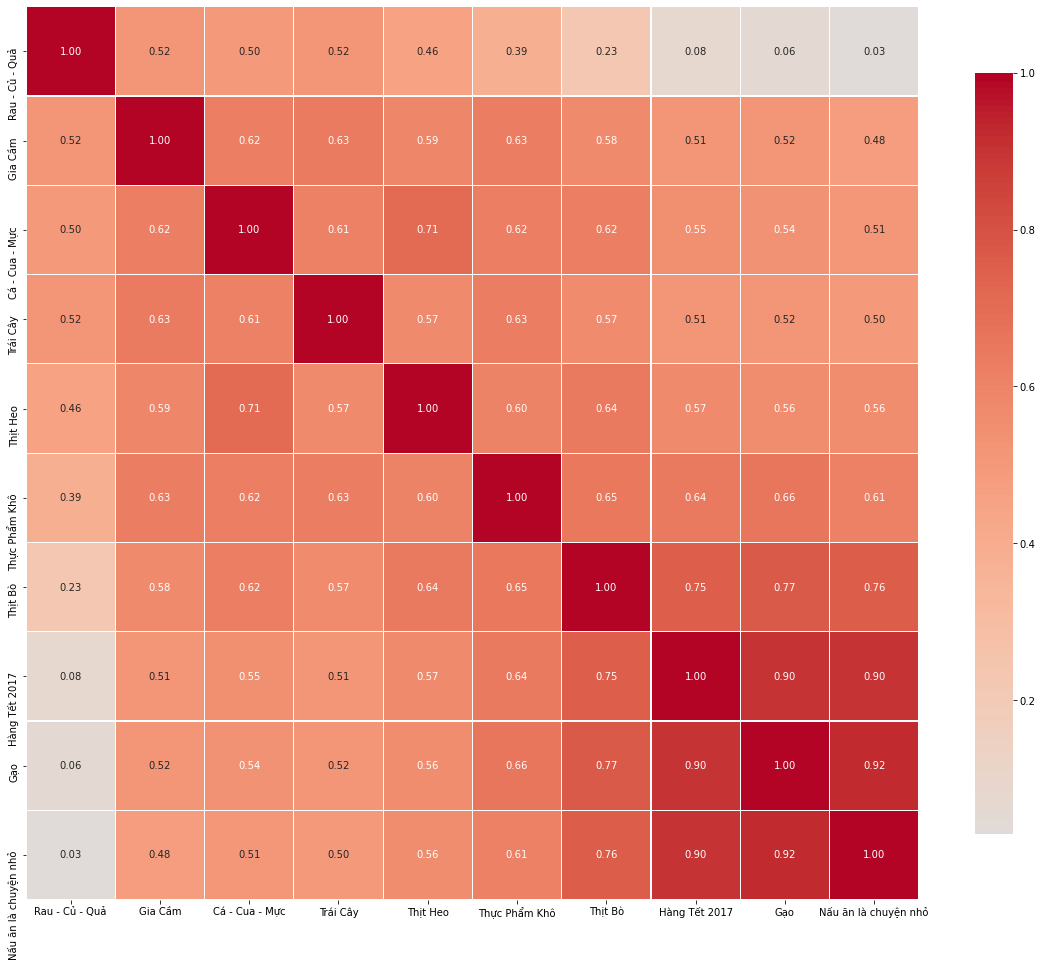

In [45]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(f_all, vmax = 1.0, center = 0, fmt = '.2f', cmap = 'coolwarm',
           square = True, linewidths = .2, annot = True, cbar_kws = {'shrink': .7})

In [46]:
# img.savefig("score_category.png")

In [47]:
# f_all